<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Autocorrelation-function" data-toc-modified-id="Autocorrelation-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autocorrelation function</a></span><ul class="toc-item"><li><span><a href="#Lag-Plot" data-toc-modified-id="Lag-Plot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lag Plot</a></span></li><li><span><a href="#Visualizations-to-choose-our-model:-ACF-(AR)-&amp;-PACF-(MA)" data-toc-modified-id="Visualizations-to-choose-our-model:-ACF-(AR)-&amp;-PACF-(MA)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizations to choose our model: ACF (AR) &amp; PACF (MA)</a></span></li></ul></li></ul></div>

In [6]:
import pandas as pd
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta

# Viz mantra
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


# Scikit learn
from sklearn.linear_model import LinearRegression #python3 -m pip install scikit-learn

import warnings
warnings.filterwarnings('ignore')

`Importing df back`

In [8]:
def import_df ():
    df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv")
    df.index = pd.to_datetime(df.date)
    infer_ = pd.infer_freq(df.index)
    return df

df = import_df ()
df

,date,value
date,,
1991-07-01,1991-07-01,3.526591
1991-08-01,1991-08-01,3.180891
1991-09-01,1991-09-01,3.252221
1991-10-01,1991-10-01,3.611003
1991-11-01,1991-11-01,3.565869
...,...,...
2008-02-01,2008-02-01,21.654285
2008-03-01,2008-03-01,18.264945
2008-04-01,2008-04-01,23.107677


## Autocorrelation function
In the broadest sense, [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) is any statistical association, although it commonly refers to the linear degree of relatedness of a pair of variables.

[Autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation), also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay.

As its name implies, autocorrelation represents the correlation between a sequence and itself. More precisely, it measures the level of similarity between a sequence from several periods ago and the actual data.
The sequence from several periods ago is called "lag", as it is a delayed version of the original. For example, if we compute autocorrelation for a time series with daily frequency, we are determining how many of yesterday's values ​​are similar to today's values. If the frequency is instead annual, then the autocorrelation will measure the similarities from year to year.

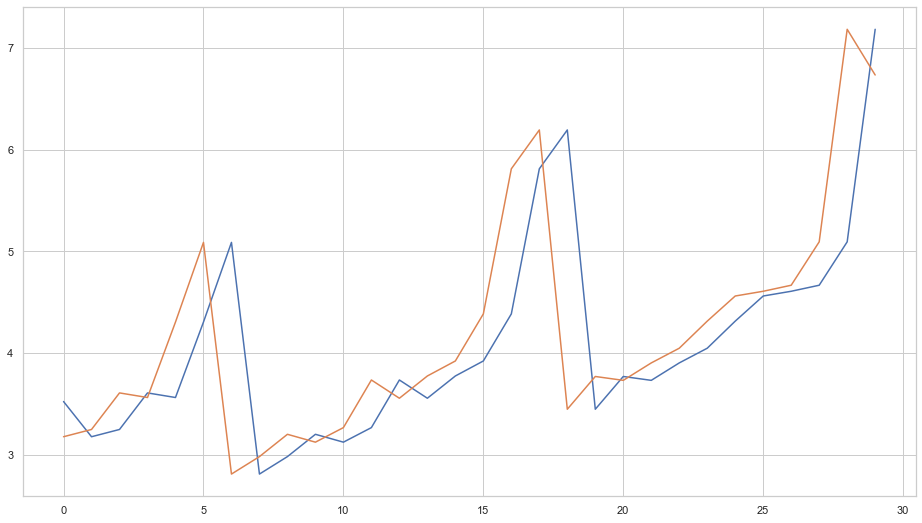

In [5]:
data_t = df["value"][:-1]
data_t_plus_1 = df["value"][1:]
plt.plot(data_t.values[:30], label="y(t)")
plt.plot(data_t_plus_1.values[:30], label="y(t)");

### Lag Plot

We can get an idea of ​​the autocorrelation by looking at a lag plot / Lag plot

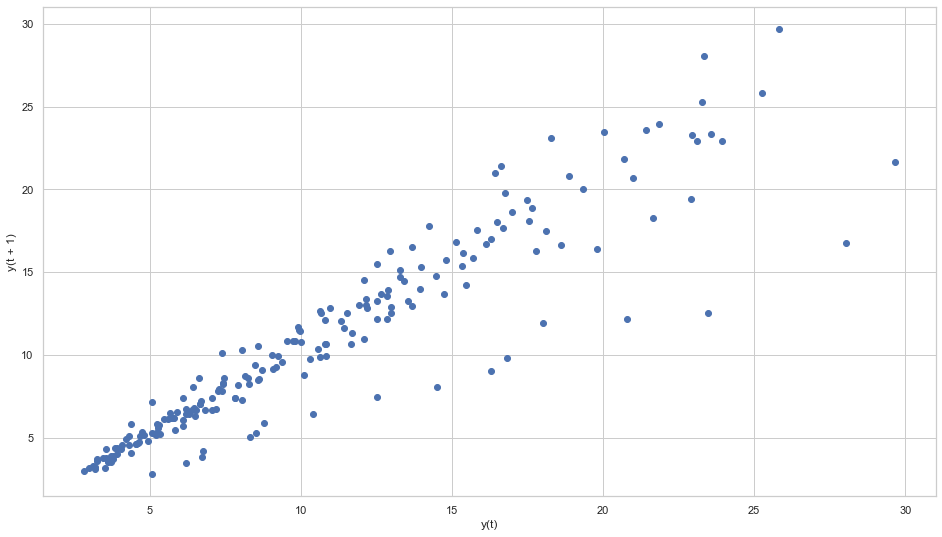

In [9]:
pd.plotting.lag_plot(df.value, lag=1);

It tells us on the x-axis that the variable is time and on the y-axis that it is t + 1, that is, it is as if we were plotting a scatterplot choosing the same variable a month later

### Visualizations to choose our model: ACF (AR) & PACF (MA)

[ACF & PCF](https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c)

`plot_acf(df.Series)`

- What is the X axis
- What is the Y axis? 
- What is the first line?
- What does the line corresponging to x=12 correspond to?

In [13]:
# x = number of lags, months of lag; 
# y = how much it is correlated

In [24]:
def plotting_acf (df):
    plot_acf(df.value);
    plt.title("Autocorrelation: value of correlation across different # of lags", size=20)
    plt.axvline(x=12, c="y", linestyle="--", label="one year")
    plt.axvline(x=16, c="r", linestyle="--")
    plt.legend()
    
        
    print("""
    We can see:
    1. Correlation strength
    2. Significance
    3. Lag interpretation
    4. Seasonality
    5. Decay""")


    Things to look at:
    1. Correlation strength
    2. Significance
    3. Lag interpretation
    4. Seasonality
    5. Decay


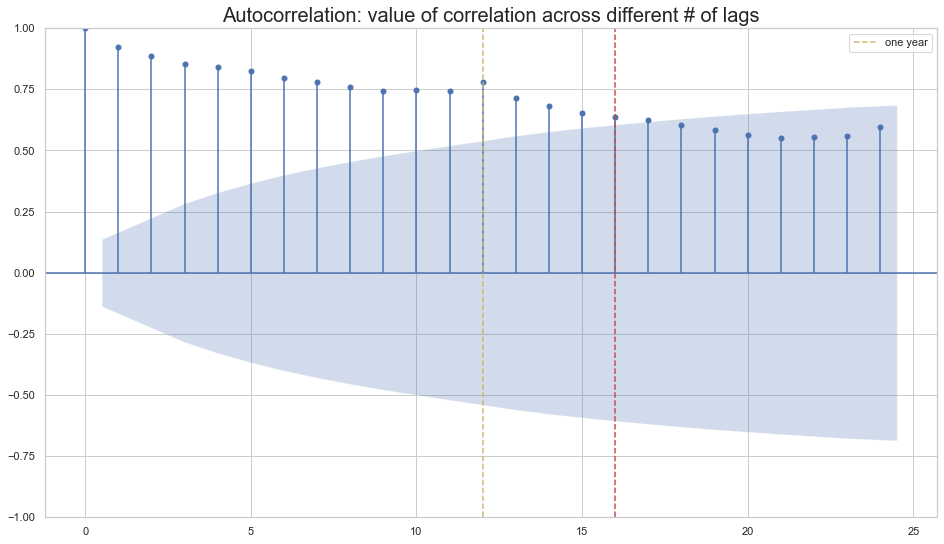

In [25]:
plotting_acf (df)

In [17]:
from statsmodels.tsa.stattools import pacf

`plot_acf(df.Series)`

- What is the X axis
- What is the Y axis? 

- What is the first line?
- What does the line corresponging to x=12 correspond to?

In [28]:
def plotting_partial (df):
    plot_pacf(df.value)
    plt.title("Partial autocorrelation: value of correlation across different # of lags", size=20)
    plt.axvline(x=2, c="r", linestyle="--", label="lags before entering shaded area")
    plt.axvline(x=4, c="r", linestyle="--", label="lags before entering shaded area");

        
    print("""
    Things to look at:
    1. Significant lags
    2. Order determination: last significant bar before getting into the shaded area
    4. Seasonality
    5. Decay""")


    Things to look at:
    1. Correlation strength
    2. Significance
    3. Lag interpretation
    4. Seasonality
    5. Decay


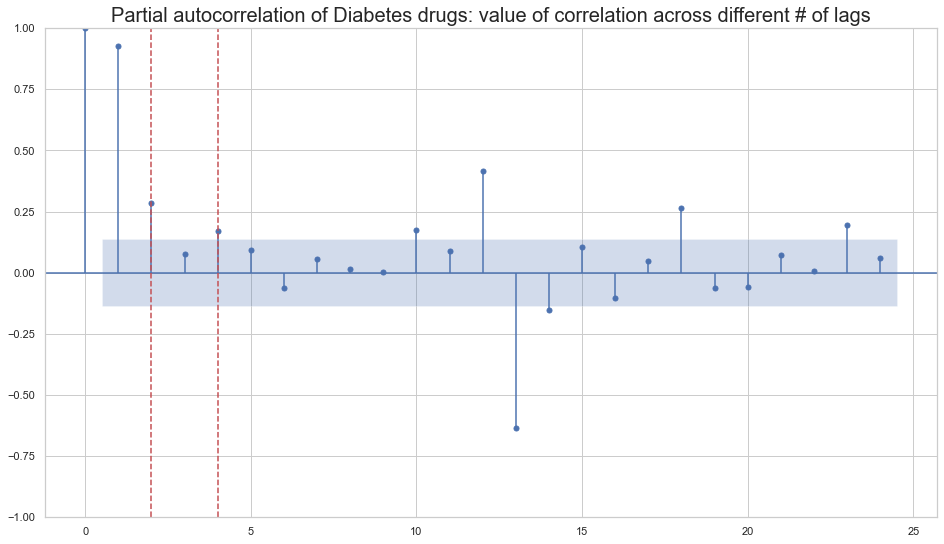

In [27]:
plotting_partial (df)